Text(0, 0.5, '%')

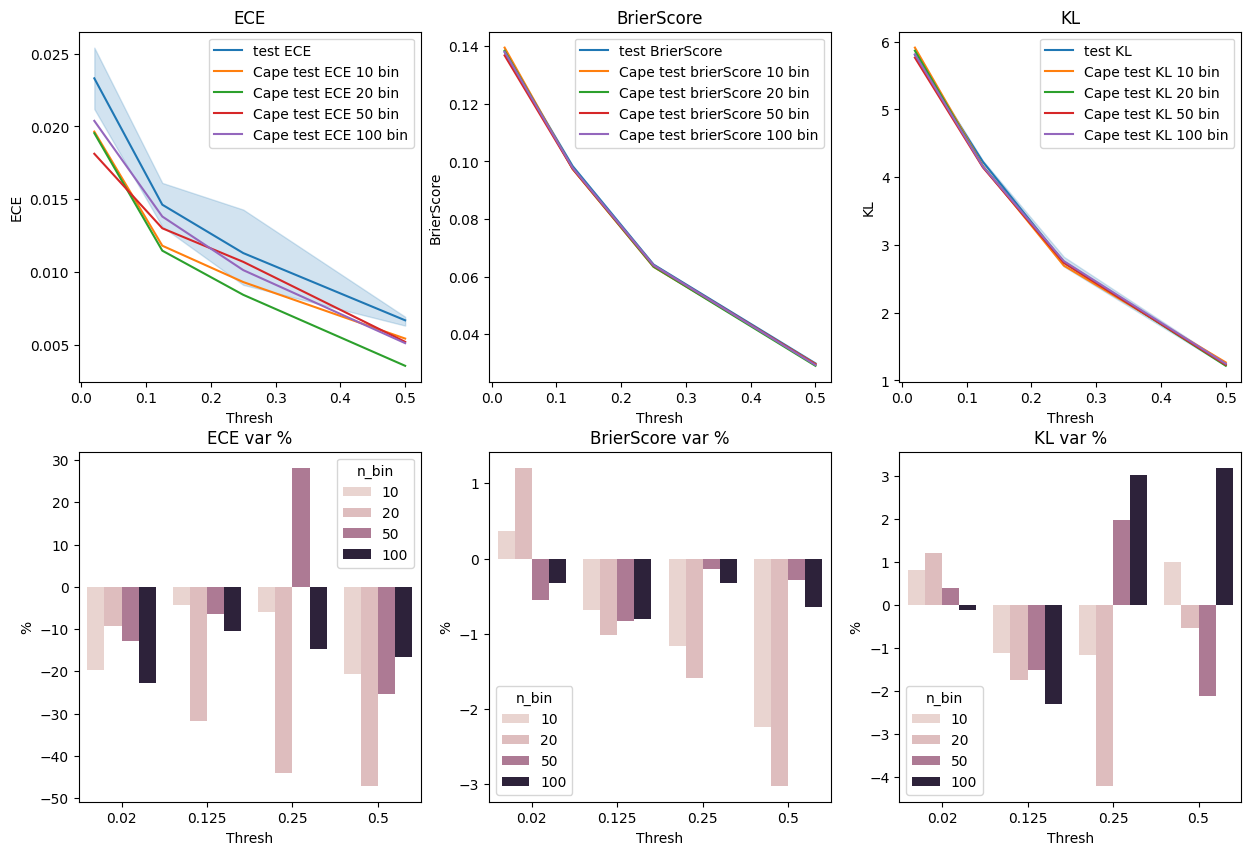

In [145]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("cape.csv")
# Estrarre le colonne necessarie
df_plot = df[df['dataset_size'] == 500]
df_plot = df_plot[df_plot['thresh']<0.7]
#df_plot = df_plot[df_plot['n_bin']==20]

#group by
df_plot = df_plot.groupby(['n_bin', 'thresh'])[['test/ECE' ,'Cape/test/ECE', 'test/brierScore', 'Cape/test/brierScore', 'test/KL', 'Cape/test/KL']].mean().reset_index()


df_plot['ECE_percent_diff'] = (df_plot['Cape/test/ECE'] - df_plot['test/ECE']) / df_plot['test/ECE'] * 100
df_plot['BR_percent_diff'] = (df_plot['Cape/test/brierScore'] - df_plot['test/brierScore']) / df_plot['test/brierScore'] * 100
df_plot['KL_percent_diff'] = (df_plot['Cape/test/KL'] - df_plot['test/KL']) / df_plot['test/KL'] * 100
df_group = df_plot

# Creare il grafico
fig, axes = plt.subplots(2, 3, figsize=(15, 10))#, sharex=True, sharey=True)
sns.lineplot(ax=axes[0][0], data=df_plot, x='thresh', y='test/ECE', label='test ECE', errorbar='ci')
for bin in [10, 20, 50, 100]:
	sns.lineplot(ax=axes[0][0], data=df_plot[df_plot['n_bin']==bin], x='thresh', y='Cape/test/ECE', label=f'Cape test ECE {bin} bin', errorbar='ci')
axes[0][0].set_title('ECE')
axes[0][0].set_xlabel('Thresh')
axes[0][0].set_ylabel('ECE')

sns.lineplot(ax=axes[0][1], data=df_plot, x='thresh', y='test/brierScore', label='test BrierScore')
for bin in [10, 20, 50, 100]:
	sns.lineplot(ax=axes[0][1], data=df_plot[df_plot['n_bin']==bin], x='thresh', y='Cape/test/brierScore', label=f'Cape test brierScore {bin} bin')
axes[0][1].set_title('BrierScore')
axes[0][1].set_xlabel('Thresh')
axes[0][1].set_ylabel('BrierScore')

sns.lineplot(ax=axes[0][2], data=df_plot, x='thresh', y='test/KL', label='test KL')
for bin in [10, 20, 50, 100]:
	sns.lineplot(ax=axes[0][2], data=df_plot[df_plot['n_bin']==bin], x='thresh', y='Cape/test/KL', label=f'Cape test KL {bin} bin')
axes[0][2].set_title('KL')
axes[0][2].set_xlabel('Thresh')
axes[0][2].set_ylabel('KL')

sns.barplot(ax=axes[1][0], data=df_plot, x='thresh', y='ECE_percent_diff', hue='n_bin')
axes[1][0].set_title('ECE var %')
axes[1][0].set_xlabel('Thresh')
axes[1][0].set_ylabel('%')

sns.barplot(ax=axes[1][1], data=df_plot, x='thresh', y='BR_percent_diff', hue='n_bin')
axes[1][1].set_title('BrierScore var %')
axes[1][1].set_xlabel('Thresh')
axes[1][1].set_ylabel('%')

sns.barplot(ax=axes[1][2], data=df_plot, x='thresh', y='KL_percent_diff', hue='n_bin')
axes[1][2].set_title('KL var %')
axes[1][2].set_xlabel('Thresh')
axes[1][2].set_ylabel('%')

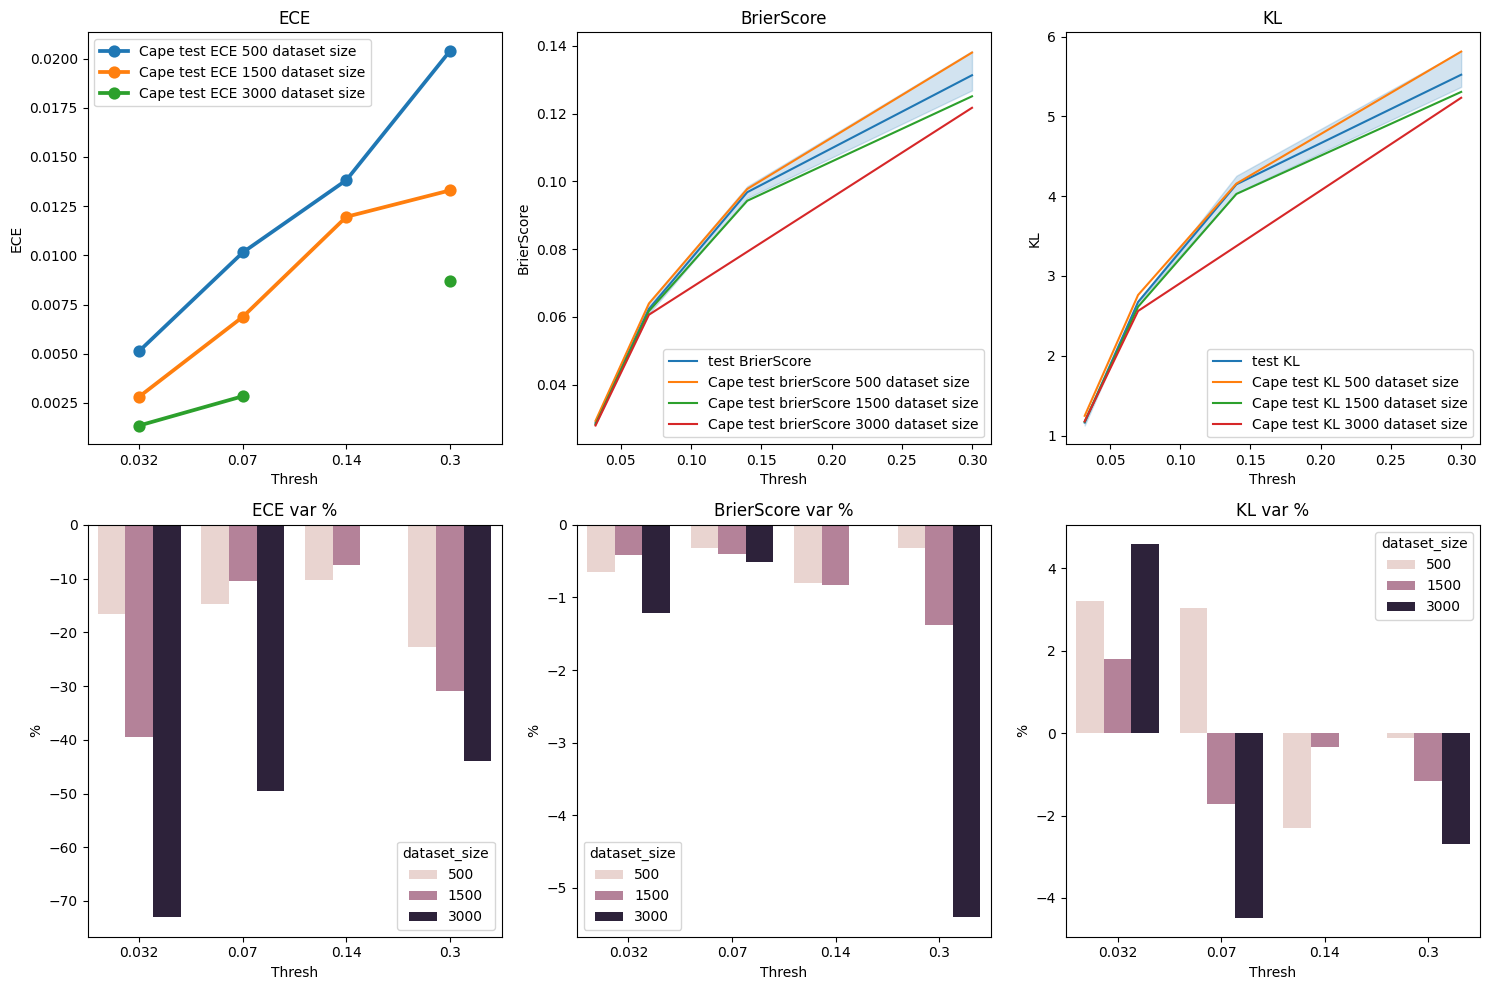

In [142]:
#filtro
df_plot = df[df['n_bin']==100]
df_plot = df_plot[df_plot['thresh']>0.011]
df_plot = df_plot.groupby(['dataset_size', 'thresh'])[['test/ECE' ,'Cape/test/ECE', 'test/brierScore', 'Cape/test/brierScore', 'test/KL', 'Cape/test/KL']].mean().reset_index()

# Calcolare le variazioni percentuali
df_plot['ECE_percent_diff'] = (df_plot['Cape/test/ECE'] - df_plot['test/ECE']) / df_plot['test/ECE'] * 100
df_plot['BR_percent_diff'] = (df_plot['Cape/test/brierScore'] - df_plot['test/brierScore']) / df_plot['test/brierScore'] * 100
df_plot['KL_percent_diff'] = (df_plot['Cape/test/KL'] - df_plot['test/KL']) / df_plot['test/KL'] * 100

# Creare il grafico
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# ECE
for size in [500, 1500, 3000]:
    sns.pointplot(ax=axes[0][0], data=df_plot[df_plot['dataset_size']==size], x='thresh', y='Cape/test/ECE', label=f'Cape test ECE {size} dataset size')
    #sns.pointplot(ax=axes[0][0], data=df_plot[df_plot['dataset_size']==size], x='thresh', y='test/ECE', label=f'test ECE {size} dataset size')
axes[0][0].set_title('ECE')
axes[0][0].set_xlabel('Thresh')
axes[0][0].set_ylabel('ECE')

# BrierScore
sns.lineplot(ax=axes[0][1], data=df_plot, x='thresh', y='test/brierScore', label='test BrierScore')
for size in [500, 1500, 3000]:
    sns.lineplot(ax=axes[0][1], data=df_plot[df_plot['dataset_size']==size], x='thresh', y='Cape/test/brierScore', label=f'Cape test brierScore {size} dataset size')
axes[0][1].set_title('BrierScore')
axes[0][1].set_xlabel('Thresh')
axes[0][1].set_ylabel('BrierScore')

# KL
sns.lineplot(ax=axes[0][2], data=df_plot, x='thresh', y='test/KL', label='test KL')
for size in [500, 1500, 3000]:
    sns.lineplot(ax=axes[0][2], data=df_plot[df_plot['dataset_size']==size], x='thresh', y='Cape/test/KL', label=f'Cape test KL {size} dataset size')
axes[0][2].set_title('KL')
axes[0][2].set_xlabel('Thresh')
axes[0][2].set_ylabel('KL')

# ECE percent difference
sns.barplot(ax=axes[1][0], data=df_plot, x='thresh', y='ECE_percent_diff', hue='dataset_size')
axes[1][0].set_title('ECE var %')
axes[1][0].set_xlabel('Thresh')
axes[1][0].set_ylabel('%')

# BrierScore percent difference
sns.barplot(ax=axes[1][1], data=df_plot, x='thresh', y='BR_percent_diff', hue='dataset_size')
axes[1][1].set_title('BrierScore var %')
axes[1][1].set_xlabel('Thresh')
axes[1][1].set_ylabel('%')

# KL percent difference
sns.barplot(ax=axes[1][2], data=df_plot, x='thresh', y='KL_percent_diff', hue='dataset_size')
axes[1][2].set_title('KL var %')
axes[1][2].set_xlabel('Thresh')
axes[1][2].set_ylabel('%')

# Mostrare i grafici
plt.tight_layout()
plt.show()

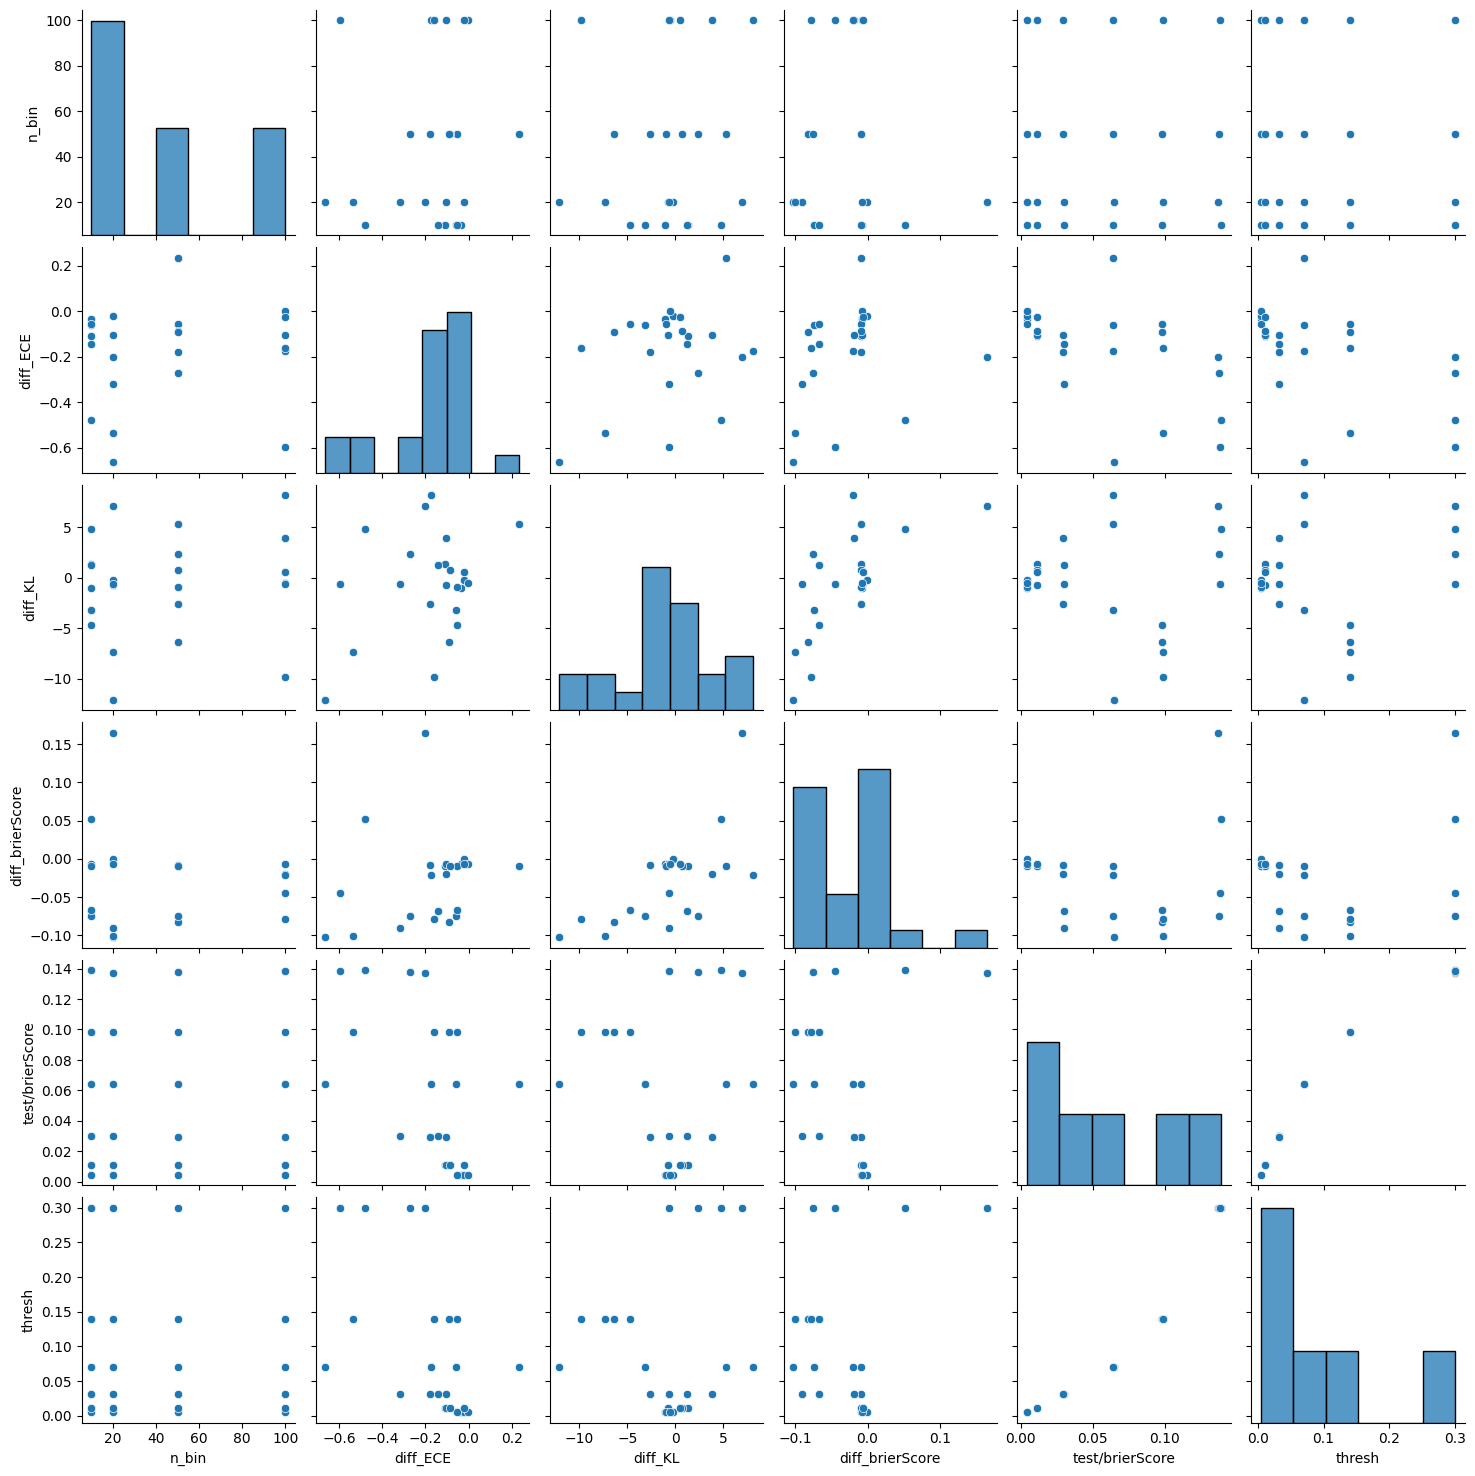

In [150]:
#th to prob
df['thresh'] = df['thresh'].replace(0.02, 0.3)
df['thresh'] = df['thresh'].replace(0.125, 0.14)
df['thresh'] = df['thresh'].replace(0.25, 0.07)
df['thresh'] = df['thresh'].replace(0.5, 0.032)
df['thresh'] = df['thresh'].replace(0.75, 0.011)
df['thresh'] = df['thresh'].replace(1, 0.005)

#group by k-fold
df = df.groupby(['n_bin', 'thresh', 'dataset_size'])[['test/ECE' ,'Cape/test/ECE', 'test/brierScore', 'Cape/test/brierScore', 'test/KL', 'Cape/test/KL']].mean().reset_index()

#calculate diff
df['diff_ECE'] = (df['Cape/test/ECE'] - df['test/ECE'])*100
df['diff_brierScore'] = (df['Cape/test/brierScore'] - df['test/brierScore'])*100
df['diff_KL'] = (df['Cape/test/KL'] - df['test/KL'])*100


df_plot=df
df_plot = df_plot[df_plot['dataset_size']==500]
df_plot=df_plot[['n_bin', 'diff_ECE', 'diff_KL', 'diff_brierScore', 'test/brierScore', 'thresh']]

sns.pairplot(data=df_plot)

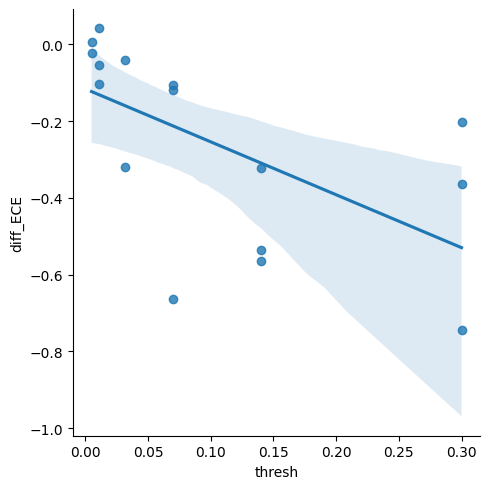

In [152]:
df_plot = df[df['n_bin']==20]

sns.lmplot(data=df_plot, x="thresh", y="diff_ECE")

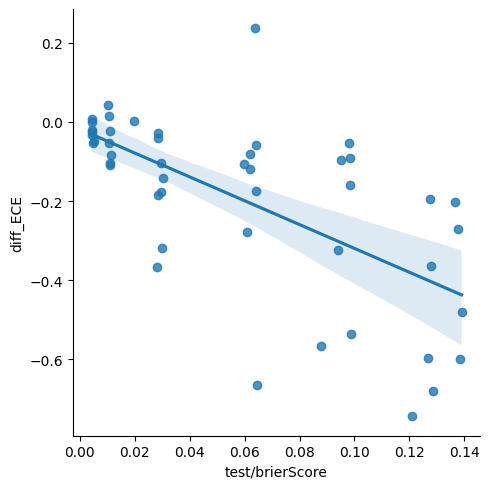

In [153]:
df_plot = df#[df['n_bin']==20]
sns.lmplot(data=df_plot, x="test/brierScore", y="diff_ECE")

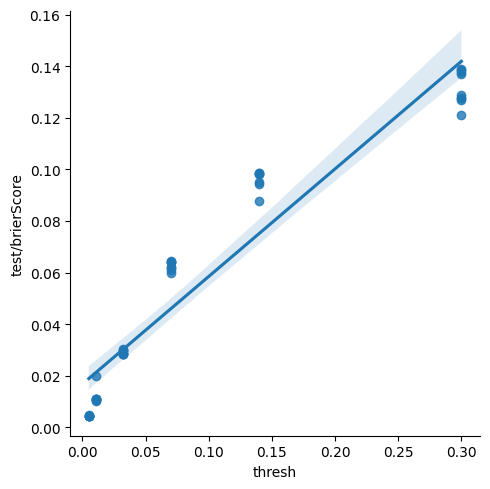

In [154]:
df_plot = df#[df['n_bin']==20]
sns.lmplot(data=df_plot, y="test/brierScore", x="thresh")

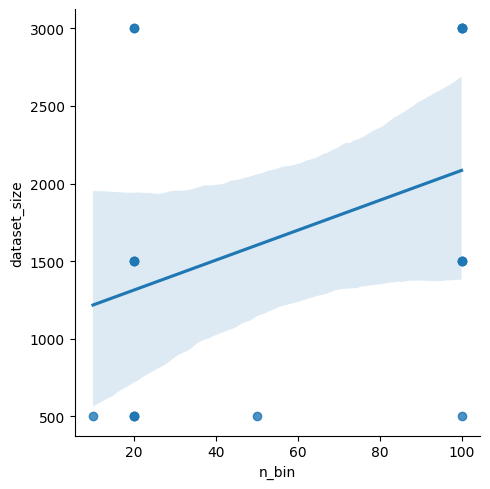

In [179]:
#calculate best n_bin
df_plot = df.loc[df.groupby(['dataset_size','thresh'])['diff_ECE'].idxmin()]
sns.lmplot(data=df_plot, y="dataset_size", x="n_bin")